# Tutorial Replication

The purpose of this notebook is simply to replicate Matt's tutorial, which can be found [on Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Sessions/List.aspx#folderID=%2265406b5e-52ef-428d-94d9-af6601597a08%22) in [two](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=c057cf3a-b1bd-4f85-a0e2-af66015ed850) [parts](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=b2e63522-720c-48e4-956a-af6901740c79); they are also [on YouTube](https://www.youtube.com/playlist?list=PLO8D5yasziTYvXqWUoiphrb0r2Ere54FS). This will help us get an idea of how the syntax differs between pure ROOT and the Jupyter kernel implementation.

## Library Imports

In [1]:
import uproot, glob, math, warnings
import numpy as np
import pandas as pd
import datetime as dt
import lmfit as lf
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
#%matplotlib inline

## Import Data
We also print the length of the first tree and its keys to ensure that data imported correctly.

(161790, 301)
['DetType', 'Empty', 'PAINTall', 'PAOFamps', 'PAOFamps0', 'PAOFchisq', 'PAOFchisqLF', 'PAOFdelay', 'PATFPamp', 'PATFPchisq', 'PATFPeflag', 'PATFPint', 'PATFPoffset', 'PATFPtau', 'PAWKf20', 'PAWKf40', 'PAWKf80', 'PAWKf90', 'PAWKf95', 'PAWKmax', 'PAWKr10', 'PAWKr100', 'PAWKr20', 'PAWKr30', 'PAWKr40', 'PAWKr50', 'PAWKr60', 'PAWKr70', 'PAWKr80', 'PAWKr90', 'PAWKr95', 'PAbias', 'PAbs', 'PAbspost', 'PAgain', 'PAnorm', 'PAsat', 'PAstd', 'PBINTall', 'PBOFamps', 'PBOFamps0', 'PBOFchisq', 'PBOFchisqLF', 'PBOFdelay', 'PBTFPamp', 'PBTFPchisq', 'PBTFPeflag', 'PBTFPint', 'PBTFPoffset', 'PBTFPtau', 'PBWKf20', 'PBWKf40', 'PBWKf80', 'PBWKf90', 'PBWKf95', 'PBWKmax', 'PBWKr10', 'PBWKr100', 'PBWKr20', 'PBWKr30', 'PBWKr40', 'PBWKr50', 'PBWKr60', 'PBWKr70', 'PBWKr80', 'PBWKr90', 'PBWKr95', 'PBbias', 'PBbs', 'PBbspost', 'PBgain', 'PBnorm', 'PBsat', 'PBstd', 'PCINTall', 'PCOFamps', 'PCOFamps0', 'PCOFchisq', 'PCOFchisqLF', 'PCOFdelay', 'PCTFPamp', 'PCTFPchisq', 'PCTFPeflag', 'PCTFPint', 'PCTFPoff

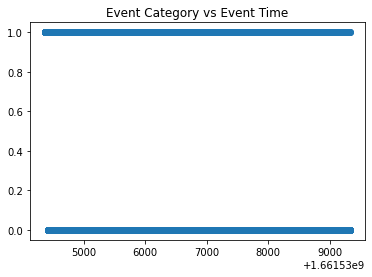

In [2]:
datapath ="/data/chocula/fritts/data/k100proc/midasrq/byseries/"
ser = ["07220822_1828","07220826_1219","07220826_1536","07220826_2007","07220827_1153","07220830_1724"]
lab = ["0V","-4V","-21V","-65V","-84V","-84V"] # Not needed for functionality - these are the HV Voltages for the series.

#Loading all branches raises warnings, but we need to in order to see what's available
warnings.simplefilter(action="ignore",category=pd.errors.PerformanceWarning)

#As a Chain is a collection of Trees, 
#I am approximating the chain as a list of Trees.
nser = 6; # Another uneeded variable.
e = []; z = [];
for s in ser: # The stuff done in this loop can also be done with the "makechain" function in R76Tools.
    e_chain = pd.DataFrame(); z_chain = pd.DataFrame(); listframes = [[],[]] 
    # Get the data from the series we are looping on and put it in a generator
    estuff = uproot.iterate(datapath+s+"/umn*root:rqDir/eventTree",library="pd")
    zstuff = uproot.iterate(datapath+s+"/umn*root:rqDir/zip1",library="pd")
    for ething,zthing in zip(estuff,zstuff): # Put the data from estuff and zstuff and put it into one list 
        listframes[0].append(ething); listframes[1].append(zthing) 
    e_chain = pd.concat(listframes[0]);z_chain = pd.concat(listframes[1]) # Put the data back into a dataframe
    e.append(e_chain); z.append(z_chain)
    
#friends are complicated. here's the docs page on tchain friends: 
#https://root.cern/doc/master/classTChain.html#a967c9e4e14e314b46e4c11bc6a1c2353
#I think this is a reasonable approximation of them
for i,x in enumerate(z): # Put the contents of e into z
    z[i] = pd.concat([x,e[i]],axis=1)

# After all this, z ends up being a list of dataframes.

print(z[0].shape)
print(list(z[0]))

plt.scatter(z[1]['EventTime'],z[1]['EventCategory'])
plt.title("Event Category vs Event Time")
plt.show()

Events have two categories; random (1) or triggered (0). Random events are taken so that we can perform diagnostics, but they aren't of any physical interest. 
Here, we are plotting them against the time they were taken. Above, we can't really see the points, so we will make a second plot that is zoomed in on the x-axis
(and has timestamp formatting).

For more information on the keys listed above, see: http://titus.stanford.edu/dokuwiki/doku.php?id=processing:cdmsbats:r133_rq_lists using the "standard" cdms user login

## Basic Plotting

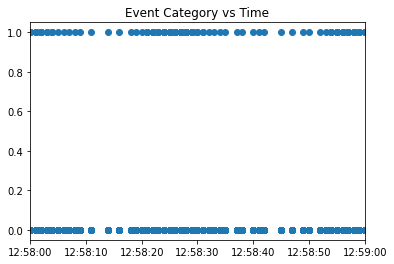

In [3]:
# Plot the same data, but constrain the time-axis
timestamps = [dt.datetime.fromtimestamp(x) for x in z[1]['EventTime'].values]
plt.scatter(timestamps,z[1]['EventCategory'])

#plt.xlim(dt.datetime(2020,8,26,11,56).timestamp(),dt.datetime(2020,8,26,12,00).timestamp())
#plt.xlim(pd.to_datetime("2020-08-26 11:56"),pd.to_datetime("2020-08-26 12:00"))

plt.xlim(pd.to_datetime("2022-08-26 12:58"),pd.to_datetime("2022-08-26 12:59"))
plt.title("Event Category vs Time")
plt.show()

Here are some "aliases" that define various values we may be referring back to often.
Unlike in ROOT, these "aliases" are calculated here once, nto recalculated each time they are called.
While it is unlikely that these would need to be recalculated due to some change in an underlying variable,
if they do, you will have to rerun this cell (or similar code in another cell) as it will not happen automatically.

In [5]:
#I don't see a better way to handle the aliases than to simply add a pandas column.
#Unfortunately this means that we will have to rerun this cell if anything the aliases depends on changes.
for x in z:
    x['PTwid'] = (x['PTWKf40'] - x['PTWKr40'])*1e6                     #Pulse width - sum all
    x['xdel'] = 1e6*(x['PEWKr20'] - 0.5*(x['PCWKr20']+x['PDWKr20']))-1 #delay x dimension
    x['ydel'] = 1e6*(0.866*(x['PDWKr20'] - x['PCWKr20']))+9            #delay y dimension
    #Angle phi, calculated from x and y 
    x['phidel'] = [180/np.pi*math.atan2(x['ydel'].array[j],x['xdel'].array[j]) for j in range(len(x['ydel'].array))]
    #x['afdel'] = 1e6*(x['PFWKr20']-x['PAWKr20']) #unknown and unused.

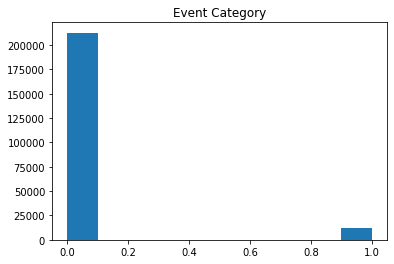

In [6]:
# How many random and triggered events are there?
plt.hist(z[1]['EventCategory'])
plt.title("Event Category")
plt.show()

## Cuts
Now we will experiment with cuts. Cuts are built similarly to the aliases above. 
They are always boolean instead of providing numeric values; their purpose is to limit what data we are displaying and fitting to.
(There are also some "regular" aliases in the cell below as they are needed later.)

In [78]:
nentries = np.zeros(10); timestart = np.zeros(10); timeend = np.zeros(10);
crand = []; ctime0 = []; cam = []; cgoodwalk = [];
i=0
for x in z:
    nentries[i] = x.shape[0] # Get the number of rows in the looped series' dataframe.
    timestart[i] = np.min(x['EventTime'])
    timeend[i] = np.max(x['EventTime'])
    crand.append(x['EventCategory']==1) # If an event is random, mark it in crand
    ctime0.append(x.index > 60000) # If an event is past the given time, mark it in ctime0
    cam.append(x['PFOFamps']/x['PTOFamps']>0.21) # If an event is in the appropriate x-range of americium, mark it in cam
    cgoodwalk.append((x['PCWKr20'] > 0.25e-3) #The result of ConstFreqRTFTWalk is probably good,
                     & (x['PCWKr20']<0.5e-3) #based on rise times.
                     & (x['PDWKr20']>0.25e-3) #This is a quality cut.
                     & (x['PDWKr20']<0.5e-3)
                     & (x['PEWKr20']>0.25e-3)
                     & (x['PEWKr20']<0.5e-3))
    i+=1
timestart[0] = z[0]["EventTime"][60001]
timesec = timeend - timestart

161790 33685


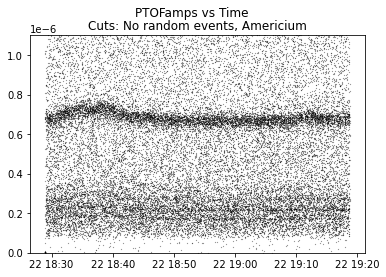

In [8]:
#print(len(~crand[0]),len(cam[0]))
print(len(z[0]['PTOFamps']),len(z[0]['PTOFamps'][~crand[0].array & cam[0]]))
# Get the timestamp of each event in the first series that's not random and is appropriate for americium
timestamps = [dt.datetime.fromtimestamp(x) for x in z[0]['EventTime'].values[~crand[0] & cam[0]]]
plt.scatter(timestamps,z[0]['PTOFamps'][~crand[0] & cam[0]],marker='.',s=0.1,color='k')

plt.ylim(0,1.1e-6)
plt.suptitle("PTOFamps vs Time")
plt.title("Cuts: No random events, Americium")
plt.show()

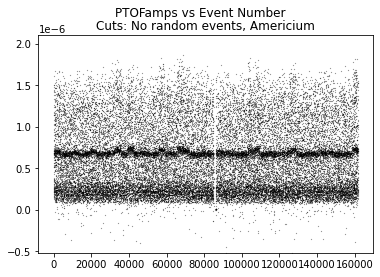

In [9]:
plt.scatter(z[0].index[~crand[0] & cam[0]],z[0]['PTOFamps'][~crand[0] & cam[0]],marker='.',s=0.1,color='k')

plt.ylim(-0.52e-6,2.1e-6)
plt.suptitle("PTOFamps vs Event Number")
plt.title("Cuts: No random events, Americium")
#plt.xlim(0,180e3)
plt.show()

## Fitting

The below plot attempts to fit to one of the peaks present. After the plot are statistics on the fitting process.

200
20


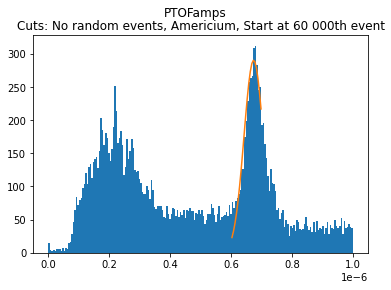

In [10]:
# Get the PTOFamps from the first series that's not random, is in the range of americium, and is after the given time.
withcut = z[0]["PTOFamps"][~crand[0] & cam[0] & ctime0[0]]
bins = np.linspace(0,1e-6,200)
hspec0 = plt.hist(withcut,bins=bins)
def gauss(x,A=1,mu=0,sigma=1):
    return A/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))
# Get the PTOFamps from 0.6*10^-6 to 0.7*10^-7
subbins = bins[(bins >= 0.6e-6) & (bins <= 0.7e-6)]
print(len(hspec0[1]))
subdata = hspec0[0][(bins[:-1] >= 0.6e-6) & (bins[:-1] <= 0.7e-6)]
print(len(subdata))

# Gaussian fit the data over the reduced range
gaussmod = lf.Model(gauss)
gaussparams = gaussmod.make_params(mu=0.675e-6)
gaussparams.add('sigma',value=1e-6,min=0)
gaussparams.add('A',value=1,min=0)
gaussfit = gaussmod.fit(subdata,gaussparams,weights=np.sqrt(subdata),x=subbins)

plt.plot(subbins,gaussfit.best_fit)
plt.suptitle("PTOFamps")
plt.title("Cuts: No random events, Americium, Start at 60 000th event")
plt.show()

gaussfit

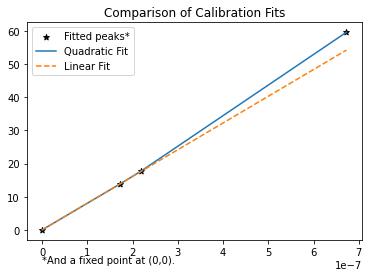

In [11]:
#Points found using gaussian fits to peaks, to be used for calibration.
#x: PTOFamps values
#y: known emission lines (keV)
gcal = [[0,1.73263e-07,2.19449e-07,6.72661e-07],[0,13.95,17.74,59.54]] # What is this?
plt.scatter(gcal[0],gcal[1],marker="*",color='k',label="Fitted peaks*")

def cal(x,a=1,b=1):
    return a*x+b*x**2

calmod = lf.Model(cal)
calparams = calmod.make_params()
calparams.add('a',value=60/7e-7,min=0)
calparams.add('b',value=1e20,min=0) #Start large to give it a push in the right direction
calfit = calmod.fit(gcal[1],calparams,x=gcal[0])

plt.plot(gcal[0],calfit.best_fit,label="Quadratic Fit")
plt.plot(gcal[0],13.95*np.asarray(gcal[0])/1.73263e-07,linestyle='--',label="Linear Fit")

plt.text(0,-10,"*And a fixed point at (0,0).")

plt.title("Comparison of Calibration Fits")
plt.legend()
plt.show()

calfit

## 2D Histograms
Many of the plots below are 2D-histograms that compare two parameters by creating a color-based histogram of frequencies.

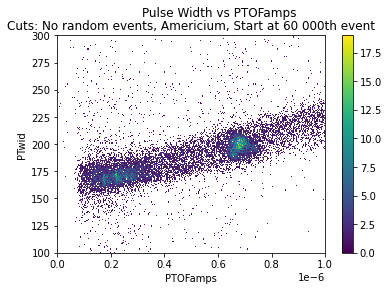

In [12]:
#Total phonon pulse energy, in keV
try: # This bit is here so that if you come back to rerun this cell, the rest of pt_keV won't get overwritten
    pt_keV[0] = calfit.best_values['a']*z[0]["PTOFamps"]+calfit.best_values['b']*z[0]["PTOFamps"]**2
except NameError:
    pt_keV = [calfit.best_values['a']*z[0]["PTOFamps"]+calfit.best_values['b']*z[0]["PTOFamps"]**2]

fig = plt.figure()

cmap = cm.viridis.copy()
cmap.set_under('w')

h = plt.hist2d(z[0]["PTOFamps"][~crand[0] & cam[0] & ctime0[0]], # First series, no random, americium, start at 60000th event
               z[0]["PTwid"][~crand[0] & cam[0] & ctime0[0]],
               bins=[np.linspace(0,1e-6,300),np.linspace(100,300,200)],cmap=cmap,vmin=1e-10)
                #force white bg instead of purple to help comparison.
    
plt.xlabel("PTOFamps")
plt.ylabel("PTwid")
plt.suptitle("Pulse Width vs PTOFamps")
plt.title("Cuts: No random events, Americium, Start at 60 000th event")
fig.colorbar(h[3])
plt.show() #Hard to tell if this is quite right... but it seems okay for now

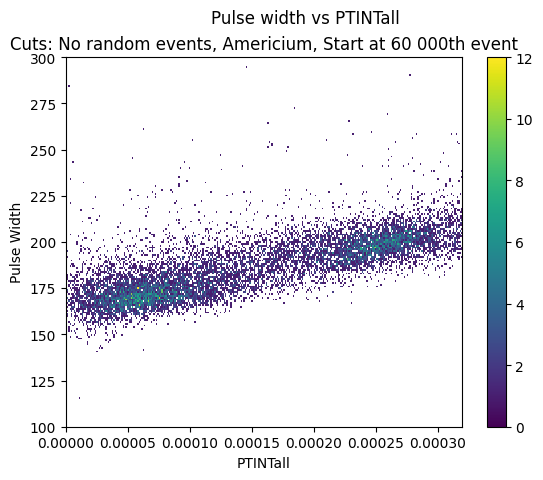

In [12]:
fig = plt.figure()

cmap = cm.viridis.copy()
cmap.set_under('w')

h = plt.hist2d(z[0]["PTINTall"][~crand[0] & cam[0] & ctime0[0]],
               z[0]["PTwid"][~crand[0] & cam[0] & ctime0[0]],
               bins=[np.linspace(0,0.32e-3,300),np.linspace(100,300,200)],cmap=cmap,vmin=1e-10)
                #force white bg instead of purple to help comparison.

fig.colorbar(h[3])
plt.xlabel("PTINTall")
plt.ylabel("Pulse Width")
plt.suptitle("Pulse width vs PTINTall")
plt.title("Cuts: No random events, Americium, Start at 60 000th event")
plt.show()

Here is a new cut to try to get good events.

In [13]:
'''
cgood is never referenced elsewhere in the code, but what it does is that it sets ctime0 as its value for the first series, 
    and all ones for each other one.
'''
cgood = [];
cgood.append(ctime0[0])
for i,x in enumerate(z):
    if i>0:
        cgood.append(np.ones(x.shape[0]))


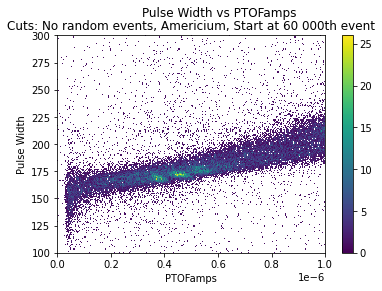

In [14]:
fig = plt.figure()

cmap = cm.viridis.copy()
cmap.set_under('w')

h = plt.hist2d(z[1]["PTOFamps"][~crand[1] & cam[1] & ctime0[1]],
               z[1]["PTwid"][~crand[1] & cam[1] & ctime0[1]],
               bins=[np.linspace(0,1e-6,300),np.linspace(100,300,200)],cmap=cmap,vmin=1e-10)
                #force white bg instead of purple to help comparison.

fig.colorbar(h[3])
plt.xlabel("PTOFamps")
plt.ylabel("Pulse Width")
plt.suptitle("Pulse Width vs PTOFamps")
plt.title("Cuts: No random events, Americium, Start at 60 000th event")
plt.show()

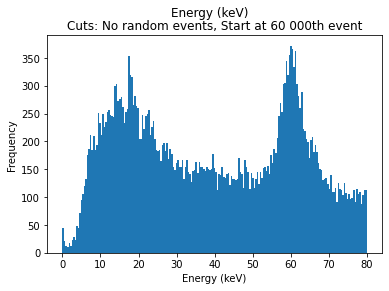

In [15]:
h0 = plt.hist(pt_keV[0][~crand[0] & ctime0[0]],bins=np.linspace(0,80,200))

plt.xlabel("Energy (keV)")
plt.ylabel("Frequency")
plt.suptitle("Energy (keV)")
plt.title("Cuts: No random events, Start at 60 000th event")
plt.show()

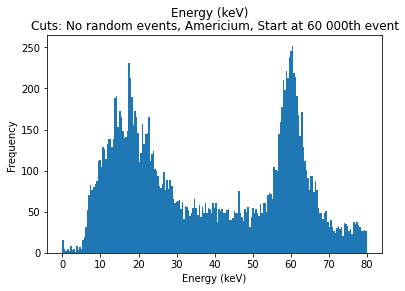

In [16]:
plt.hist(pt_keV[0][~crand[0] & ctime0[0] & cam[0]],bins=np.linspace(0,80,200))
plt.xlabel("Energy (keV)")
plt.ylabel("Frequency")
plt.suptitle("Energy (keV)")
plt.title("Cuts: No random events, Americium, Start at 60 000th event")
plt.show()

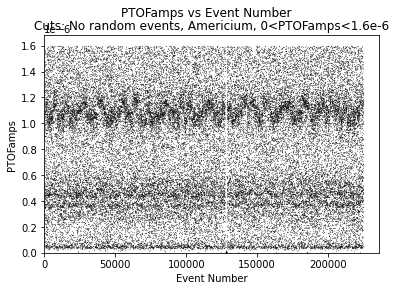

In [17]:
cam[1] = z[1]["PFOFamps"]/z[1]["PTOFamps"] > 0.26 # The aliasing cell earlier has a cutoff at 0.21.
# Including non-random, americium events with 0<PTOFamps<1.6*10^-6,
plt.scatter(z[1].index[~crand[1] & cam[1] & (z[1]["PTOFamps"] > 0) & (z[1]["PTOFamps"] < 1.6e-6)], # plot the event number,
            z[1]["PTOFamps"][~crand[1] & cam[1] & (z[1]["PTOFamps"] > 0) & (z[1]["PTOFamps"] < 1.6e-6)], # against PTOFamps,
            s=0.02,color='k') # with small marker size in black and white.

plt.xlabel("Event Number")
plt.ylabel("PTOFamps")
plt.suptitle("PTOFamps vs Event Number")
plt.title("Cuts: No random events, Americium, 0<PTOFamps<1.6e-6") #note: for plotting alone, this last cut could easily be done by simply adjusting the plot limits
plt.ylim(0); plt.xlim(0)
plt.show()

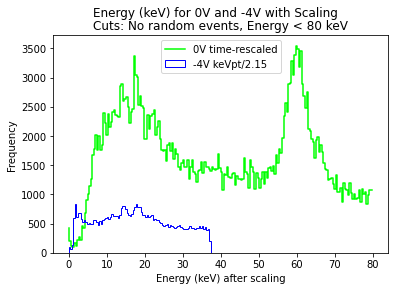

In [68]:
try: # These coefficients are used interchangeably with the best-fit parameters a and b.
    pt_keV[1] = 7.73882e+07*z[1]["PTOFamps"]+1.653756e+13*z[1]["PTOFamps"]**2
except IndexError:
    pt_keV.append(7.73882e+07*z[1]["PTOFamps"]+1.653756e+13*z[1]["PTOFamps"]**2)

# h0[1] is np.linspace(0,80,200)
# Therefore, (h0[1][:-1]+h0[1][1:])/2 is np.linspace(0.201,79.799,199)
plt.step((h0[1][:-1]+h0[1][1:])/2,h0[0]*timesec[1]/timesec[0],color='lime',label="0V time-rescaled")
h1 = plt.hist(np.asarray(pt_keV[1])[(np.asarray(pt_keV[1])<80) & ~crand[1]]/2.15,
         bins=np.linspace(0,80,200),histtype='step',color='blue',label="-4V keVpt/2.15")#,linewidth=2)
plt.legend()
plt.xlabel("Energy (keV) after scaling")
plt.ylabel("Frequency")
plt.suptitle("Energy (keV) for 0V and -4V with Scaling")
plt.title("Cuts: No random events, Energy < 80 keV")
plt.show()

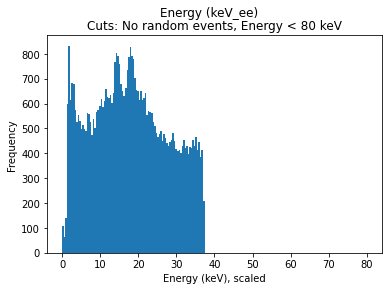

In [20]:
plt.hist(pt_keV[1][~crand[1] & (pt_keV[1]<80)]/2.15,bins=np.linspace(0,80,200))
plt.xlabel("Energy (keV), scaled")
plt.ylabel("Frequency")
plt.suptitle("Energy (keV_ee)")
plt.title("Cuts: No random events, Energy < 80 keV")
plt.show()

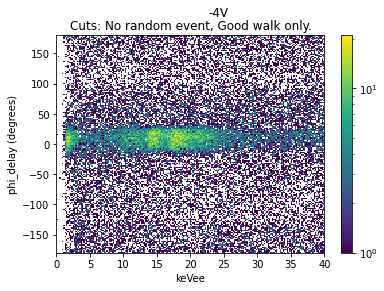

In [21]:
fig = plt.figure()
h = plt.hist2d(pt_keV[1][~crand[1] & cgoodwalk[1]]/2.15,
               z[1]["phidel"][~crand[1] & cgoodwalk[1]],
               bins=[np.linspace(0,40,200),np.linspace(-180,180,180)],
               cmap=cmap,norm=colors.LogNorm())
               #force white bg instead of purple to help comparison.
    
plt.suptitle("-4V")
plt.xlabel("keVee")
plt.ylabel("phi_delay (degrees)")
plt.title("Cuts: No random event, Good walk only.")
fig.colorbar(h[3])
plt.show()

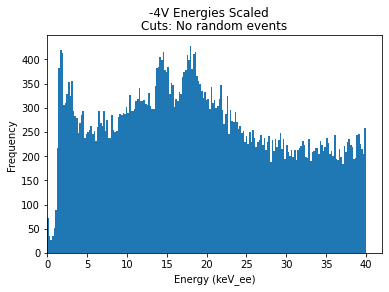

In [22]:
plt.hist(pt_keV[1][~crand[1]]/2.15,bins=np.linspace(0,40,200))
plt.xlim(0)
plt.xlabel("Energy (keV_ee)")
plt.ylabel("Frequency")
plt.title("Cuts: No random events")
plt.suptitle("-4V Energies Scaled")
plt.show()

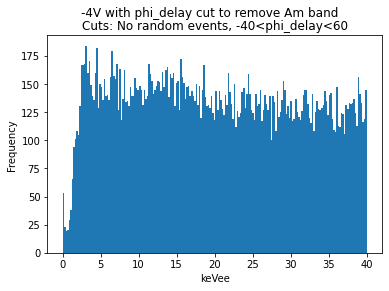

In [23]:
plt.hist(pt_keV[1][~crand[1] & ~((z[1]["phidel"]>-40) & (z[1]["phidel"]<60))]/2.15,bins=np.linspace(0,40,200))
plt.suptitle("-4V with phi_delay cut to remove Am band")
plt.xlabel("keVee")
plt.ylabel("Frequency")
plt.title("Cuts: No random events, -40<phi_delay<60")
plt.show()

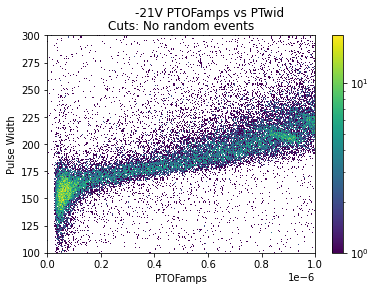

In [24]:
fig = plt.figure()
h = plt.hist2d(z[2]["PTOFamps"][~crand[2]],z[2]["PTwid"][~crand[2]],
           bins=(np.linspace(0,1e-6,300),np.linspace(100,300,200)),cmap=cmap,norm=colors.LogNorm())
plt.xlabel("PTOFamps")
plt.ylabel("Pulse Width")
plt.title("Cuts: No random events")
plt.suptitle(lab[2]+" PTOFamps vs PTwid")
fig.colorbar(h[3])
plt.show()

The try/except cases below are designed to make the code a bit more robust when run out of order.

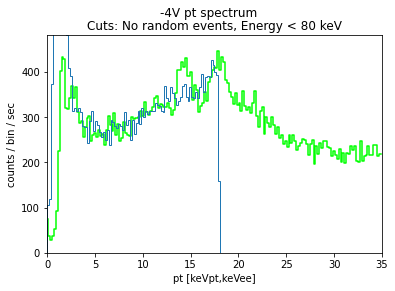

In [69]:
try: # The definition of pt_keV can reasonably be put into one cell.
    pt_keV[2] = 7.738820e+07*z[2]["PTOFamps"]+1.653756e+13*z[2]["PTOFamps"]**2
except IndexError:
    pt_keV.append(7.738820e+07*z[2]["PTOFamps"]+1.653756e+13*z[2]["PTOFamps"]**2)
try:
    pt0_keV[2] = 7.738820e+07*z[2]["PTOFamps0"]+1.653756e+13*z[2]["PTOFamps0"]**2
except NameError:
    pt0_keV = [[],[],7.738820e+07*z[2]["PTOFamps0"]+1.653756e+13*z[2]["PTOFamps0"]**2]

h1 = np.histogram(pt_keV[1][~crand[1]]/2.15,bins=np.linspace(0,35,175));
fig = plt.figure()

# Using an index on a matplotlib plot yields the argument in that spot.
plt.step((h1[1][:-1]+h1[1][1:])/2,h1[0]*timesec[2]/timesec[1],color='lime',label="-4V keVpt/2.15 time-rescaled")
h2 = plt.hist(pt_keV[2][~crand[2] & (pt_keV[2]<80)]/4.45,bins=np.linspace(0,35,175),histtype='step')

plt.suptitle("-4V pt spectrum")
plt.title("Cuts: No random events, Energy < 80 keV")
plt.xlabel("pt [keVpt,keVee]");plt.ylabel("counts / bin / sec")
plt.xlim(0,35);plt.ylim(0,480)
plt.show()

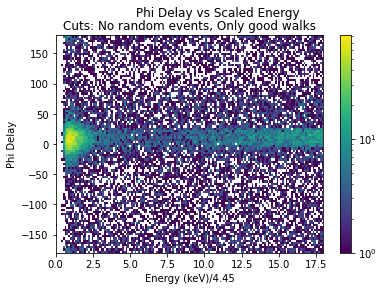

In [26]:
fig = plt.figure()
h = plt.hist2d(pt_keV[2][~crand[2] & cgoodwalk[2]]/4.45,z[2]["phidel"][~crand[2] & cgoodwalk[2]],
           bins=(np.linspace(0,18,150),np.linspace(-180,180,100)),norm=colors.LogNorm())
fig.colorbar(h[3])
plt.xlabel("Energy (keV)/4.45")
plt.ylabel("Phi Delay")
plt.suptitle("Phi Delay vs Scaled Energy")
plt.title("Cuts: No random events, Only good walks")
plt.show()

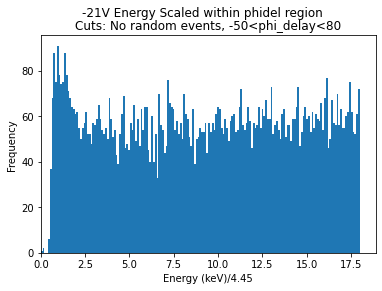

In [27]:
plt.hist(pt_keV[2][~crand[2] & ~((z[2]["phidel"]>-50)&(z[2]["phidel"]<80)) & cgoodwalk[2]]/4.45,
         bins=np.linspace(0,18,180)) # No random, phi delay between -50 and 80
plt.xlim(0)
plt.xlabel("Energy (keV)/4.45")
plt.ylabel("Frequency")
plt.suptitle(lab[2]+" Energy Scaled within phidel region")
plt.title("Cuts: No random events, -50<phi_delay<80")
plt.show()

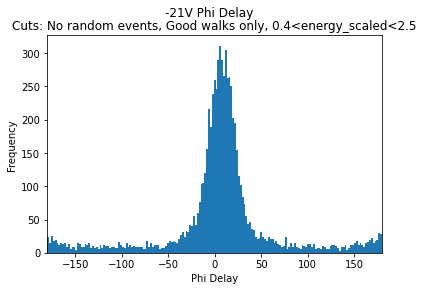

In [28]:
plt.hist(z[2]["phidel"][~crand[2] & cgoodwalk[2] & (pt_keV[2]/4.45 > 0.4) & (pt_keV[2]/4.15 < 2.5)],
         bins=np.linspace(-180,180,180))
plt.title("Cuts: No random events, Good walks only, 0.4<energy_scaled<2.5")
plt.suptitle(lab[2]+" Phi Delay")
plt.xlabel("Phi Delay")
plt.ylabel("Frequency")
plt.xlim(-180,180)
plt.show()

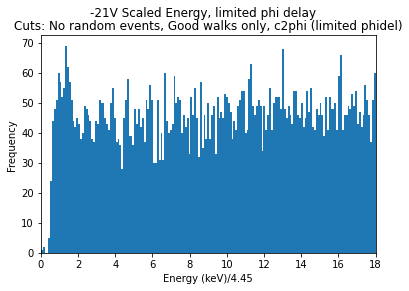

In [29]:
for x in z: # An event has c2phi true if its phidel is between -160 and -50 or between 50 and 70.
    x["c2phi"] = ((x["phidel"] > -160) & (x["phidel"] < -50)) | ((x["phidel"] > 70) & (x["phidel"] < 150))
    
plt.hist(pt_keV[2][~crand[2] & cgoodwalk[2] & z[2]["c2phi"]]/4.45,bins=np.linspace(0,18,180))
plt.xlim(0,18)
plt.xlabel("Energy (keV)/4.45")
plt.ylabel("Frequency")
plt.title("Cuts: No random events, Good walks only, c2phi (limited phidel)")
plt.suptitle(lab[2]+" Scaled Energy, limited phi delay")
plt.show()

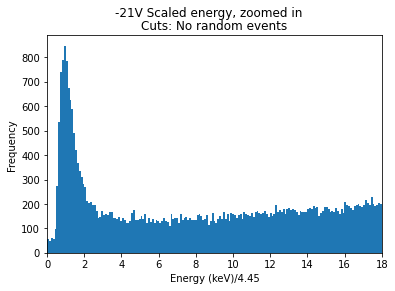

In [30]:
h2 = plt.hist(pt_keV[2][~crand[2]]/4.45,bins=np.linspace(0,18,180))
plt.xlim(0,18)
plt.xlabel("Energy (keV)/4.45")
plt.ylabel("Frequency")
plt.title("Cuts: No random events")
plt.suptitle(lab[2]+" Scaled energy, zoomed in")
plt.show()

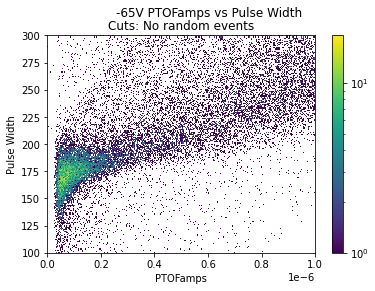

In [31]:
fig = plt.figure()
h = plt.hist2d(z[3]["PTOFamps"][~crand[3]],z[3]["PTwid"][~crand[3]],
           bins=(np.linspace(0,1e-6,300),np.linspace(100,300,200)),norm=colors.LogNorm())
fig.colorbar(h[3])
plt.title("Cuts: No random events")
plt.xlabel("PTOFamps")
plt.ylabel("Pulse Width")
plt.suptitle(lab[3]+" PTOFamps vs Pulse Width")
plt.show()

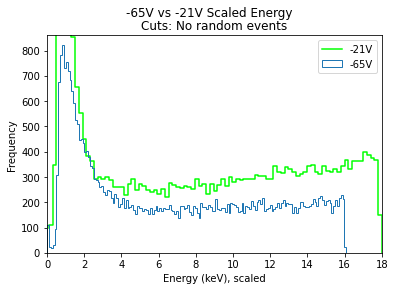

In [71]:
try:
    pt_keV[3] = 7.738820e+07*z[3]["PTOFamps"]+1.653756e+13*z[3]["PTOFamps"]**2
except IndexError:
    pt_keV.append(7.738820e+07*z[3]["PTOFamps"]+1.653756e+13*z[3]["PTOFamps"]**2)
try:
    pt0_keV[3] = 7.738820e+07*z[3]["PTOFamps0"]+1.653756e+13*z[3]["PTOFamps0"]**2
except IndexError:
    pt0_keV.append(7.738820e+07*z[3]["PTOFamps0"]+1.653756e+13*z[3]["PTOFamps0"]**2)

plt.step((h2[1][:-1]+h2[1][1:])/2,h2[0]*timesec[3]/timesec[2],color='lime',label=lab[2])
h3 = plt.hist(pt_keV[3][~crand[3] & (pt_keV[3]<80)]/5,bins=np.linspace(0,18,180),histtype='step',label=lab[3])
plt.xlim(0,18); plt.ylim(0,860)
plt.xlabel("Energy (keV), scaled")
plt.ylabel("Frequency")
plt.title("Cuts: No random events")
plt.suptitle(lab[3]+" vs "+lab[2]+" Scaled Energy")
plt.legend()
plt.show()

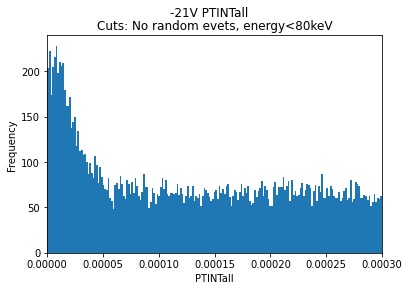

In [34]:
h2i = plt.hist(z[2]["PTINTall"][~crand[2] & (pt_keV[2]<80)],bins=np.linspace(0,0.0003,200))
plt.xlim(0,0.0003)
plt.title("Cuts: No random evets, energy<80keV")
plt.xlabel("PTINTall"); plt.ylabel("Frequency")
plt.suptitle(lab[2]+" PTINTall")
plt.show()

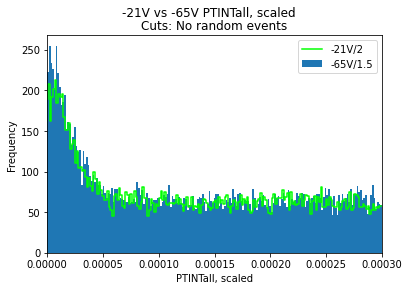

In [72]:
plt.step((h2i[1][:-1]+h2i[1][1:])/2,h2i[0]*timesec[3]/timesec[2],color='lime',label=lab[2]+"/2")
plt.hist(z[3]["PTINTall"][~crand[3]]/1.5,bins=np.linspace(0,0.0003,200),label=lab[3]+"/1.5")
plt.suptitle(lab[2]+" vs "+lab[3]+" PTINTall, scaled")
plt.title("Cuts: No random events")
plt.xlabel("PTINTall, scaled")
plt.ylabel("Frequency")
plt.legend()

plt.xlim(0,0.0003)
plt.show()

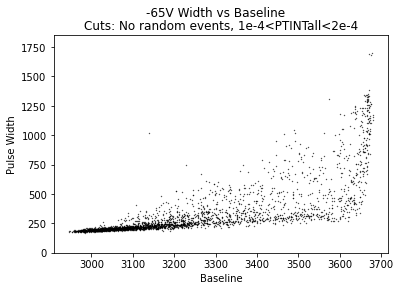

In [36]:
plt.scatter(z[3]["PFbs"][~crand[3] & (z[3]["PTINTall"]>0.1e-3) & (z[3]["PTINTall"]<0.2e-3)],
            z[3]["PTwid"][~crand[3] & (z[3]["PTINTall"]>0.1e-3) & (z[3]["PTINTall"]<0.2e-3)],
           s=0.1,color='k')
plt.ylim(0,1850)
plt.xlabel("Baseline"); plt.ylabel("Pulse Width")
plt.title("Cuts: No random events, 1e-4<PTINTall<2e-4")
plt.suptitle(lab[3]+" Width vs Baseline")
plt.show()

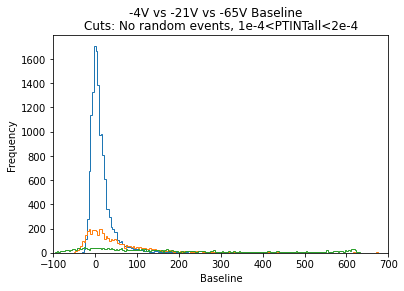

In [37]:
h1bs = plt.hist(z[1]["PFbs"][~crand[1] & (z[1]["PTINTall"]>0.1e-3) & (z[1]["PTINTall"]<0.2e-3)] - 3026,
         bins = np.linspace(-100,700,200),histtype="step")
h2bs = plt.hist(z[2]["PFbs"][~crand[2] & (z[2]["PTINTall"]>0.1e-3) & (z[2]["PTINTall"]<0.2e-3)] - 2935,
         bins = np.linspace(-100,700,200),histtype="step")
h3bs = plt.hist(z[3]["PFbs"][~crand[3] & (z[3]["PTINTall"]>0.1e-3) & (z[3]["PTINTall"]<0.2e-3)] - 3050,
         bins = np.linspace(-100,700,200),histtype="step")
plt.suptitle(lab[1]+" vs "+lab[2]+" vs "+lab[3]+" Baseline")
plt.title("Cuts: No random events, 1e-4<PTINTall<2e-4")
plt.xlabel("Baseline"); plt.ylabel("Frequency")
plt.xlim(-100,700)
plt.show()

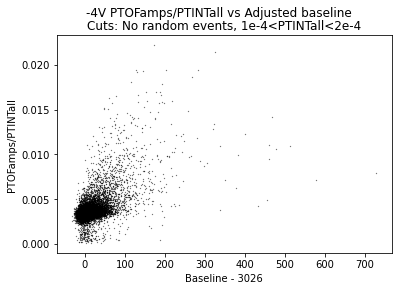

In [38]:
plt.scatter(z[1]["PFbs"][~crand[1] & (z[1]["PTINTall"]>0.1e-3) & (z[1]["PTINTall"]<0.2e-3)] - 3026, 
            z[1]["PTOFamps"][~crand[1] & (z[1]["PTINTall"]>0.1e-3) & (z[1]["PTINTall"]<0.2e-3)]/z[1]["PTINTall"][~crand[1] & (z[1]["PTINTall"]>0.1e-3) & (z[1]["PTINTall"]<0.2e-3)],
           s=0.05,color='k')
plt.title("Cuts: No random events, 1e-4<PTINTall<2e-4")
plt.xlabel("Baseline - 3026"); plt.ylabel("PTOFamps/PTINTall")
plt.suptitle(lab[1]+" PTOFamps/PTINTall vs Adjusted baseline")
plt.show()

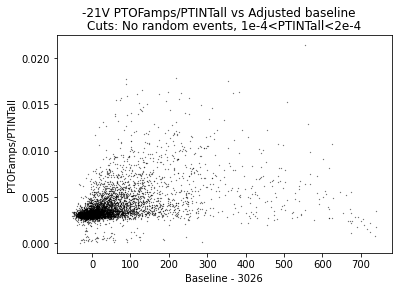

In [39]:
plt.scatter(z[2]["PFbs"][~crand[2] & (z[2]["PTINTall"]>0.1e-3) & (z[2]["PTINTall"]<0.2e-3)] - 2935, 
            z[2]["PTOFamps"][~crand[2] & (z[2]["PTINTall"]>0.1e-3) & (z[2]["PTINTall"]<0.2e-3)]/z[2]["PTINTall"][~crand[2] & (z[2]["PTINTall"]>0.1e-3) & (z[2]["PTINTall"]<0.2e-3)],
           s=0.05,color='k')
plt.title("Cuts: No random events, 1e-4<PTINTall<2e-4")
plt.xlabel("Baseline - 3026"); plt.ylabel("PTOFamps/PTINTall")
plt.suptitle(lab[2]+" PTOFamps/PTINTall vs Adjusted baseline")
plt.show()

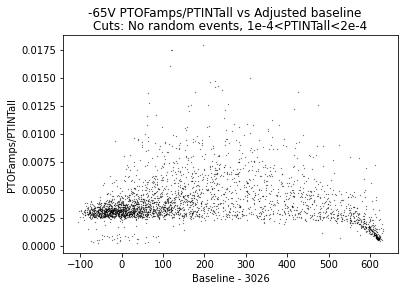

In [40]:
plt.scatter(z[3]["PFbs"][~crand[3] & (z[3]["PTINTall"]>0.1e-3) & (z[3]["PTINTall"]<0.2e-3)] - 3050, 
            z[3]["PTOFamps"][~crand[3] & (z[3]["PTINTall"]>0.1e-3) & (z[3]["PTINTall"]<0.2e-3)]/z[3]["PTINTall"][~crand[3] & (z[3]["PTINTall"]>0.1e-3) & (z[3]["PTINTall"]<0.2e-3)],
           s=0.05,color='k')
plt.title("Cuts: No random events, 1e-4<PTINTall<2e-4")
plt.xlabel("Baseline - 3026"); plt.ylabel("PTOFamps/PTINTall")
plt.suptitle(lab[3]+" PTOFamps/PTINTall vs Adjusted baseline")
plt.show()

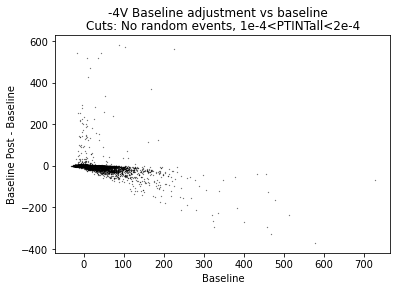

In [41]:
c3bs = z[3]["PFbs"] - 3050 < 540
plt.scatter(z[1]["PFbs"][~crand[1] & (z[1]["PTINTall"]>0.1e-3) & (z[1]["PTINTall"]<0.2e-3)]-3026,
            z[1]["PFbspost"][~crand[1] & (z[1]["PTINTall"]>0.1e-3) & (z[1]["PTINTall"]<0.2e-3)] 
            - z[1]["PFbs"][~crand[1] & (z[1]["PTINTall"]>0.1e-3) & (z[1]["PTINTall"]<0.2e-3)],
           s=0.05,color='k')
plt.xlabel("Baseline"); plt.ylabel("Baseline Post - Baseline")
plt.title("Cuts: No random events, 1e-4<PTINTall<2e-4")
plt.suptitle(lab[1]+" Baseline adjustment vs baseline")
plt.show()

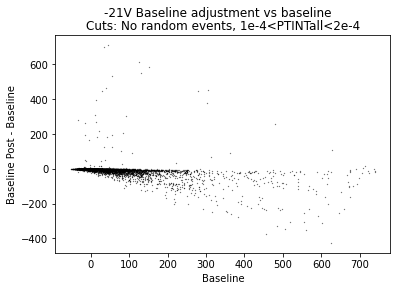

In [42]:
plt.scatter(z[2]["PFbs"][~crand[2] & (z[2]["PTINTall"]>0.1e-3) & (z[2]["PTINTall"]<0.2e-3)]-2935,
            z[2]["PFbspost"][~crand[2] & (z[2]["PTINTall"]>0.1e-3) & (z[2]["PTINTall"]<0.2e-3)] 
            - z[2]["PFbs"][~crand[2] & (z[2]["PTINTall"]>0.1e-3) & (z[2]["PTINTall"]<0.2e-3)],
           s=0.05,color='k')
plt.xlabel("Baseline"); plt.ylabel("Baseline Post - Baseline")
plt.title("Cuts: No random events, 1e-4<PTINTall<2e-4")
plt.suptitle(lab[2]+" Baseline adjustment vs baseline")
plt.show()

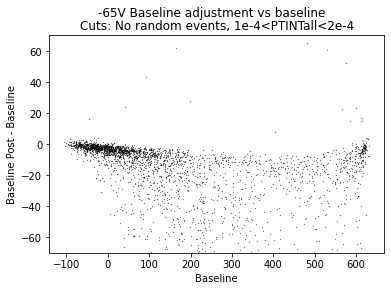

In [43]:
plt.scatter(z[3]["PFbs"][~crand[3] & (z[3]["PTINTall"]>0.1e-3) & (z[3]["PTINTall"]<0.2e-3)]-3050,
            z[3]["PFbspost"][~crand[3] & (z[3]["PTINTall"]>0.1e-3) & (z[3]["PTINTall"]<0.2e-3)] 
            - z[3]["PFbs"][~crand[3] & (z[3]["PTINTall"]>0.1e-3) & (z[3]["PTINTall"]<0.2e-3)],
           s=0.05,color='k')
plt.xlabel("Baseline"); plt.ylabel("Baseline Post - Baseline")
plt.title("Cuts: No random events, 1e-4<PTINTall<2e-4")
plt.suptitle(lab[3]+" Baseline adjustment vs baseline")
plt.ylim(-70,70)
plt.show()

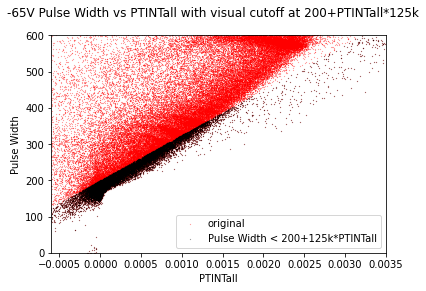

In [44]:
c2wid = z[2]["PTwid"]<180 + 125000*z[2]["PTINTall"]
c3wid = z[3]["PTwid"]<200 + 125000*z[3]["PTINTall"]
plt.scatter(z[3]["PTINTall"][~crand[3] & cgoodwalk[3]],z[3]["PTwid"][~crand[3] & cgoodwalk[3]],
           s=0.02,color='r',label='original')
plt.scatter(z[3]["PTINTall"][~crand[3] & cgoodwalk[3] & c3wid],
            z[3]["PTwid"][~crand[3] & cgoodwalk[3] & c3wid],s=0.02,color='k',label='Pulse Width < 200+125k*PTINTall')
plt.legend()
plt.suptitle(lab[3]+" Pulse Width vs PTINTall with visual cutoff at 200+PTINTall*125k")
plt.xlabel("PTINTall"); plt.ylabel("Pulse Width")
plt.ylim(0,600);plt.xlim(-0.0006,0.0035)
plt.show()

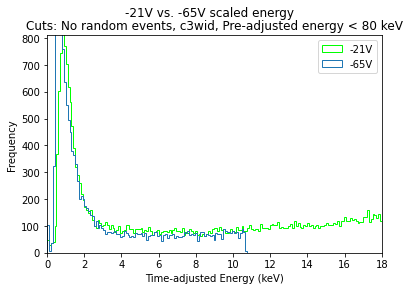

In [73]:
fig = plt.figure()

h2w = plt.hist(pt_keV[2][~crand[2] & c2wid]/4.45*timesec[3]/timesec[2],bins=np.linspace(0,18,180),
              color='lime',histtype='step',label=lab[2])
h3w = plt.hist(pt_keV[3][~crand[3] & c3wid & (pt_keV[3]<80)]/7.5,bins=np.linspace(0,18,180),histtype='step',label=lab[3])

plt.xlabel("Time-adjusted Energy (keV)"); plt.ylabel("Frequency")
plt.title("Cuts: No random events, c3wid, Pre-adjusted energy < 80 keV")
plt.suptitle(lab[2]+" vs. "+lab[3]+" scaled energy")

plt.legend()
plt.xlim(0,18);plt.ylim(0,810)
plt.show()

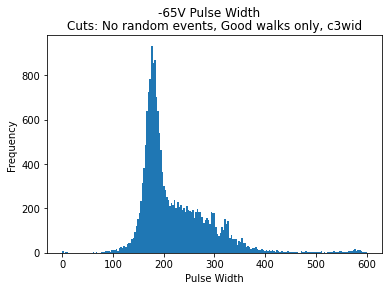

In [46]:
plt.hist(z[3]["PTwid"][~crand[3] & cgoodwalk[3] & c3wid],bins=np.linspace(0,600,200))
plt.title("Cuts: No random events, Good walks only, c3wid")
plt.suptitle(lab[3]+" Pulse Width")
plt.xlabel("Pulse Width"); plt.ylabel("Frequency")
plt.show()

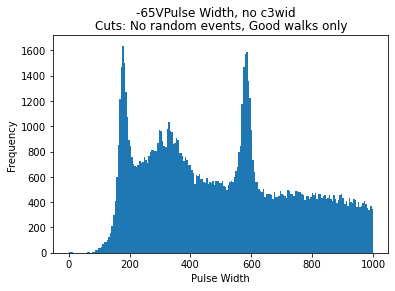

In [47]:
plt.hist(z[3]["PTwid"][~crand[3] & cgoodwalk[3]],bins=np.linspace(0,1000,200))
plt.suptitle(lab[3]+"Pulse Width, no c3wid")
plt.title("Cuts: No random events, Good walks only")
plt.xlabel("Pulse Width"); plt.ylabel("Frequency")
plt.show()

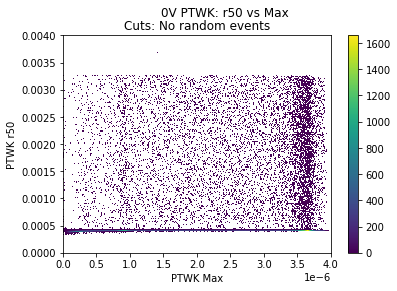

In [48]:
fig = plt.figure()
h = plt.hist2d(z[0]["PTWKmax"][~crand[0]],z[0]["PTWKr50"][~crand[0]],
           bins=(np.linspace(0,4e-6,300),np.linspace(0,0.004,200)),cmap=cmap,vmin=1e-10)
fig.colorbar(h[3])
plt.xlabel("PTWK Max"); plt.ylabel("PTWK r50")
plt.title("Cuts: No random events")
plt.suptitle(lab[0]+" PTWK: r50 vs Max")
plt.show()

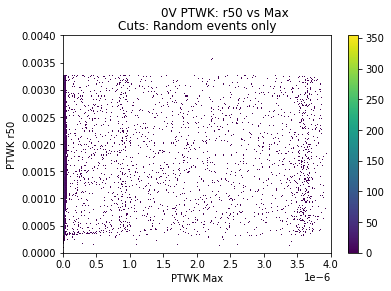

In [49]:
fig = plt.figure()
h = plt.hist2d(z[0]["PTWKmax"][crand[0]],z[0]["PTWKr50"][crand[0]],
           bins=(np.linspace(0,4e-6,300),np.linspace(0,0.004,200)),cmap=cmap,vmin=1e-10)
fig.colorbar(h[3])
plt.xlabel("PTWK Max"); plt.ylabel("PTWK r50")
plt.title("Cuts: Random events only")
plt.suptitle(lab[0]+" PTWK: r50 vs Max")
plt.show()

In [74]:
print("Random events in",lab[0],"data:", len(crand[0][crand[0]]))
print("Random events in",lab[0],"with PTWK max above 5e-7 and PTWK r50 between 5e-4 and 3e-3:", len(crand[0][crand[0] & (z[0]["PTWKmax"] > 0.5e-6) & (z[0]["PTWKr50"]>0.0005) & (z[0]["PTWKr50"] < 0.003)]))
twindow = 0.003-0.0005
rate_rand = math.log(15345/(15345-1727))/twindow
print("Rate of random events in",lab[0],"(Hz):",rate_rand)
print("Non-random events in",lab[0],"beyond 60kth with PTWK max above 5e-7: ",len(crand[0][~crand[0] & ctime0[0] & (z[0]["PTWKmax"]>0.5e-6)]))
rate_trig = 78339/timesec[0]
print("Trigger rate in",lab[0],"(Hz):",rate_trig)
effic_write = rate_trig/rate_rand
print("Write efficiency for",lab[0]+":",effic_write)

Random events in 0V data: 15345
Random events in 0V with PTWK max above 5e-7 and PTWK r50 between 5e-4 and 3e-3: 1727
Rate of random events in 0V (Hz): 47.75889640436981
Non-random events in 0V beyond 60kth with PTWK max above 5e-7:  77559
Trigger rate in 0V (Hz): 150.94219653179192
Write efficiency for 0V: 3.1605042807894765


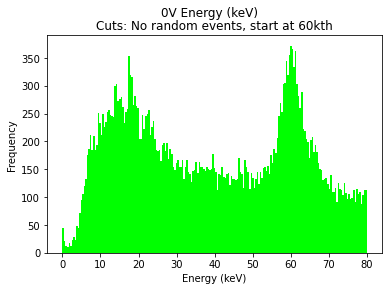

In [51]:
plt.hist(pt_keV[0][~crand[0] & ctime0[0]],bins=np.linspace(0,80,200),color='lime')
plt.xlabel("Energy (keV)"); plt.ylabel("Frequency")
plt.title("Cuts: No random events, start at 60kth")
plt.suptitle(lab[0]+" Energy (keV)")
plt.show()

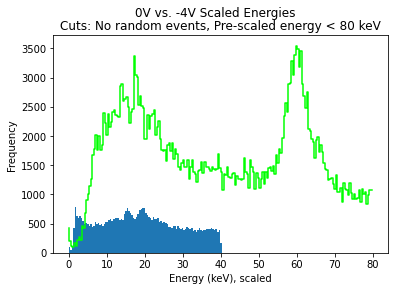

In [77]:
pt_keV[1] = 7.738820e+07*z[1]["PTOFamps"] + 1.653756e+13*z[1]["PTOFamps"]**2

plt.step((h0[1][:-1]+h0[1][1:])/2,h0[0]*timesec[1]/timesec[0],color='lime')
h1 = plt.hist(pt_keV[1][~crand[1] & (pt_keV[1]<80)]/2.,bins=np.linspace(0,80,200))

plt.suptitle(lab[0]+" vs. "+lab[1]+" Scaled Energies")
plt.title("Cuts: No random events, Pre-scaled energy < 80 keV")
plt.xlabel("Energy (keV), scaled"); plt.ylabel("Frequency")
plt.show()

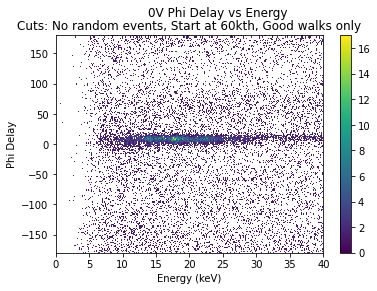

In [53]:
fig = plt.figure()
h = plt.hist2d(pt_keV[0][~crand[0] & ctime0[0] & cgoodwalk[0]],z[0]["phidel"][~crand[0] & ctime0[0] & cgoodwalk[0]],
           bins=(np.linspace(0,40,300),np.linspace(-180,180,200)),cmap=cmap,vmin=1e-10)
fig.colorbar(h[3])
plt.xlabel("Energy (keV)"); plt.ylabel("Phi Delay")
plt.title("Cuts: No random events, Start at 60kth, Good walks only")
plt.suptitle(lab[0]+" Phi Delay vs Energy")
plt.show()

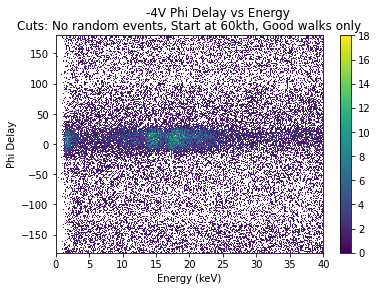

In [54]:
fig = plt.figure()
h = plt.hist2d(pt_keV[1][~crand[1] & cgoodwalk[1]]/2.15,z[1]["phidel"][~crand[1] & cgoodwalk[1]],
           bins=(np.linspace(0,40,300),np.linspace(-180,180,200)),cmap=cmap,vmin=1e-10)
fig.colorbar(h[3])
plt.xlabel("Energy (keV)"); plt.ylabel("Phi Delay")
plt.title("Cuts: No random events, Start at 60kth, Good walks only")
plt.suptitle(lab[1]+" Phi Delay vs Energy")
plt.show()

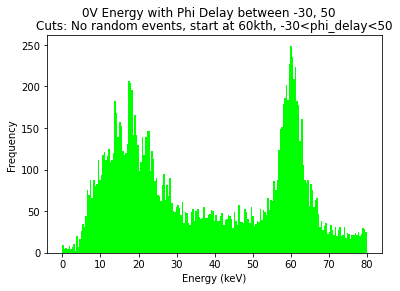

In [55]:
camphi = []
for x in z: # Define camphi as whenphidel is between -30 and 50
    camphi.append((x["phidel"]>-30) & (x["phidel"]<50))

h0am = plt.hist(pt_keV[0][~crand[0] & ctime0[0] & camphi[0]],bins=np.linspace(0,80,200),color='lime')

plt.xlabel("Energy (keV)"); plt.ylabel("Frequency")
plt.title("Cuts: No random events, start at 60kth, -30<phi_delay<50")
plt.suptitle(lab[0]+" Energy with Phi Delay between -30, 50")

plt.show()

At this point, I've stopped frequently encountering issues -- so I think I have the hang of things. No need to continue replicating <i>everything</i>; we should move on to trying out cdmsbats.